In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the API key.
from config import weather_api_key
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [18]:
import requests
requests.__version__

'2.25.1'

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luanda
Processing Record 2 of Set 1 | istok
Processing Record 3 of Set 1 | chokwe
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | ust-kuyga
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | sibu
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | iskateley
Processing Record 17 of Set 1 | necochea
Processing Record 18 of Set 1 | santa eulalia del rio
City not found. Skipping...
Processing Record 19 of Set 1 | waw
Processing Record 20 of Set 1 | sao filipe
Processing Record 21 of Set 1 | faanui
Processing Record 22 of Set 1 | lagoa
Processing Record 23 of

Processing Record 38 of Set 4 | esperance
Processing Record 39 of Set 4 | deputatskiy
Processing Record 40 of Set 4 | mehran
Processing Record 41 of Set 4 | walvis bay
Processing Record 42 of Set 4 | burnie
Processing Record 43 of Set 4 | atambua
Processing Record 44 of Set 4 | evensk
Processing Record 45 of Set 4 | aykhal
Processing Record 46 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 47 of Set 4 | port moresby
Processing Record 48 of Set 4 | peruibe
Processing Record 49 of Set 4 | providencia
Processing Record 50 of Set 4 | bhatkal
Processing Record 1 of Set 5 | san francisco de becerra
Processing Record 2 of Set 5 | umm lajj
Processing Record 3 of Set 5 | goderich
Processing Record 4 of Set 5 | cadillac
Processing Record 5 of Set 5 | arlit
Processing Record 6 of Set 5 | puerto lopez
Processing Record 7 of Set 5 | bunbury
Processing Record 8 of Set 5 | aasiaat
Processing Record 9 of Set 5 | tiznit
Processing Record 10 of Set 5 | baykit
Processing Record

Processing Record 29 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 30 of Set 8 | ponta do sol
Processing Record 31 of Set 8 | babylon
Processing Record 32 of Set 8 | gayeri
Processing Record 33 of Set 8 | yeppoon
Processing Record 34 of Set 8 | muriwai beach
Processing Record 35 of Set 8 | port lincoln
Processing Record 36 of Set 8 | sinnamary
Processing Record 37 of Set 8 | sliac
City not found. Skipping...
Processing Record 38 of Set 8 | bonavista
Processing Record 39 of Set 8 | ayorou
Processing Record 40 of Set 8 | jati
Processing Record 41 of Set 8 | rawson
Processing Record 42 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 8 | hasaki
Processing Record 44 of Set 8 | hami
Processing Record 45 of Set 8 | yenagoa
Processing Record 46 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 8 | kingsport
Processing Record 48 of Set 8 | kamina
Processing Record 49 of Set 8 | matamoros
Processing Record 50 of Set 8 

Processing Record 13 of Set 12 | port blair
Processing Record 14 of Set 12 | kathu
Processing Record 15 of Set 12 | kologriv
Processing Record 16 of Set 12 | hualmay
Processing Record 17 of Set 12 | xocali
Processing Record 18 of Set 12 | tarakan
Processing Record 19 of Set 12 | zhicheng
Processing Record 20 of Set 12 | sorland
Processing Record 21 of Set 12 | nelipyno
Processing Record 22 of Set 12 | varska
City not found. Skipping...
Processing Record 23 of Set 12 | kasra
City not found. Skipping...
Processing Record 24 of Set 12 | varena
Processing Record 25 of Set 12 | muisne
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | aksarka
Processing Record 28 of Set 12 | bilibino
Processing Record 29 of Set 12 | tautira
Processing Record 30 of Set 12 | nakusp
Processing Record 31 of Set 12 | lata
Processing Record 32 of Set 12 | nouadhibou
Processing Record 33 of Set 12 | dubti
Processing Record 34 of Set 12 | north bend
Processing Record 35 of Set 12 | dukat
P

In [22]:
len(city_data)

563

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luanda,-8.8368,13.2343,80.60,69,75,11.50,AO,2021-10-02 12:39:24
1,Istok,42.7808,20.4875,67.15,41,0,3.80,XK,2021-10-02 12:39:54
2,Chokwe,-24.5333,32.9833,96.37,21,100,10.56,MZ,2021-10-02 12:39:54
3,Albany,42.6001,-73.9662,54.30,94,92,3.94,US,2021-10-02 12:32:24
4,Ushuaia,-54.8000,-68.3000,35.26,69,75,1.14,AR,2021-10-02 12:34:43
5,Punta Arenas,-53.1500,-70.9167,37.51,75,0,16.11,CL,2021-10-02 12:34:51
6,Souillac,-20.5167,57.5167,77.38,69,75,16.11,MU,2021-10-02 12:35:00
7,Ust-Kuyga,70.0167,135.6000,15.87,98,72,1.72,RU,2021-10-02 12:39:54
8,Saskylakh,71.9167,114.0833,15.78,98,99,3.53,RU,2021-10-02 12:34:55
9,Sibu,2.3000,111.8167,80.91,88,40,5.01,MY,2021-10-02 12:38:15


In [30]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luanda,AO,2021-10-02 12:39:24,-8.8368,13.2343,80.60,69,75,11.50
1,Istok,XK,2021-10-02 12:39:54,42.7808,20.4875,67.15,41,0,3.80
2,Chokwe,MZ,2021-10-02 12:39:54,-24.5333,32.9833,96.37,21,100,10.56
3,Albany,US,2021-10-02 12:32:24,42.6001,-73.9662,54.30,94,92,3.94
4,Ushuaia,AR,2021-10-02 12:34:43,-54.8000,-68.3000,35.26,69,75,1.14
...,...,...,...,...,...,...,...,...,...
558,Skelleftea,SE,2021-10-02 12:41:55,64.7507,20.9528,54.00,65,90,1.99
559,Chiredzi,ZW,2021-10-02 12:41:55,-21.0500,31.6667,102.40,14,9,7.49
560,San Ramon De La Nueva Oran,AR,2021-10-02 12:41:55,-23.1322,-64.3260,76.33,56,97,1.88
561,Marsh Harbour,BS,2021-10-02 12:41:56,26.5412,-77.0636,80.80,61,100,20.87


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

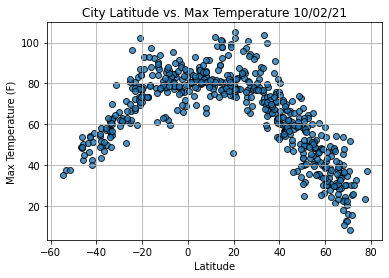

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

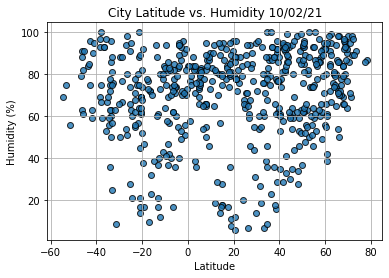

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

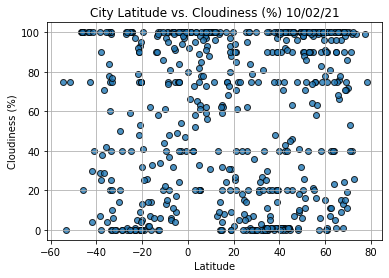

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

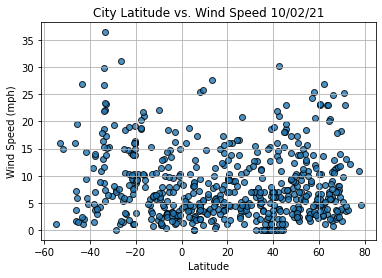

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [42]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [44]:
index13 = city_data_df.loc[13]
index13

City                     Qaqortoq
Country                        GL
Date          2021-10-02 12:37:08
Lat                       60.7167
Lng                      -46.0333
Max Temp                     30.7
Humidity                       42
Cloudiness                      0
Wind Speed                   4.36
Name: 13, dtype: object

In [45]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Istok,XK,2021-10-02 12:39:54,42.7808,20.4875,67.15,41,0,3.80
3,Albany,US,2021-10-02 12:32:24,42.6001,-73.9662,54.30,94,92,3.94
7,Ust-Kuyga,RU,2021-10-02 12:39:54,70.0167,135.6000,15.87,98,72,1.72
8,Saskylakh,RU,2021-10-02 12:34:55,71.9167,114.0833,15.78,98,99,3.53
9,Sibu,MY,2021-10-02 12:38:15,2.3000,111.8167,80.91,88,40,5.01


In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

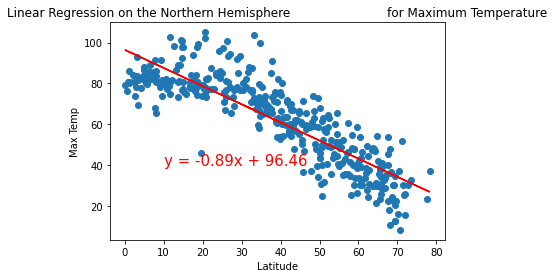

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

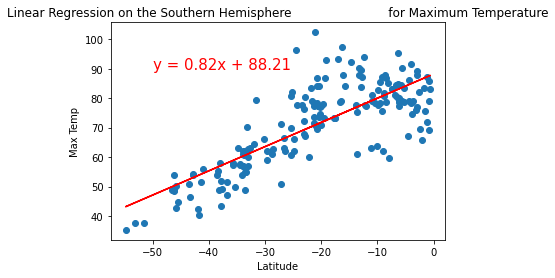

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

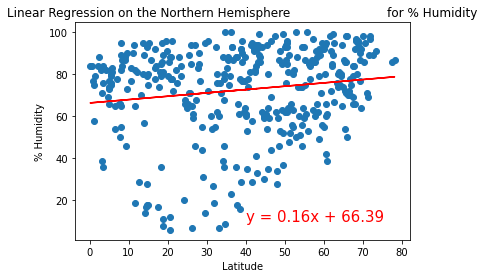

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

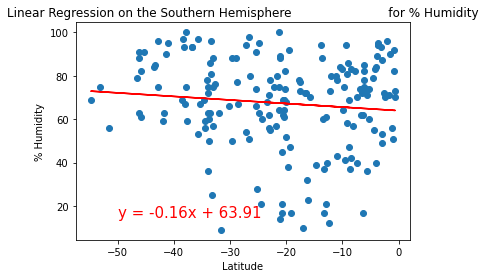

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

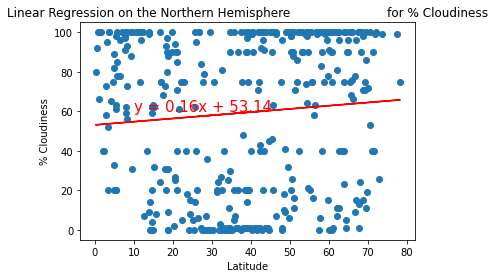

In [62]:
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

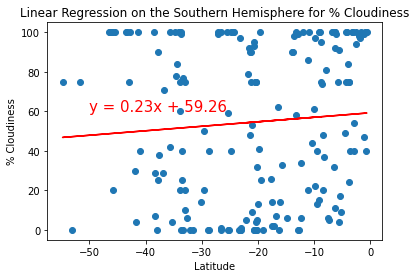

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                         '% Cloudiness',(-50,60))

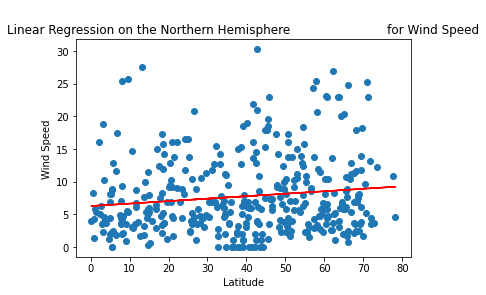

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

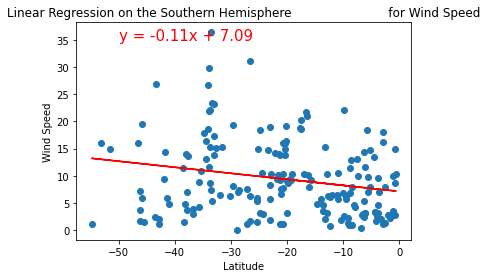

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))